<a href="https://colab.research.google.com/github/PRITI1999/final-year/blob/master/IPL_Score_prediction_playerwise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse



**TODO**

WE can try the same method with the over by over approach as well 

So that when we feed the model with final inputs we can feed the first 10 overs as well


taks done- 
After feature engineering , we have the following data on which we are trying to predict the score 


In [ ]:
data = pd.read_csv('final_data.csv')

In [ ]:
data.head()

,Unnamed: 0,id,innings_number,over,ball,batsman,non_striker,bowler,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team,batsman_runs,balls_faced,strike_rate,Boundary Fours,Boundary Sixes,50s,100s,overs,runs_conceded,wickets_taken,economy_rate
0,0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,20,19,105.26,1.0,1.0,0,0,3.0,41,1.0,10.7
1,1,335982,1,6,2,RT Ponting,BB McCullum,AA Noffke,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,20,19,105.26,1.0,1.0,0,0,3.0,41,1.0,10.7
2,2,335982,1,6,4,RT Ponting,BB McCullum,AA Noffke,0,2,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,20,19,105.26,1.0,1.0,0,0,3.0,41,1.0,10.7
3,3,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,158,71,222.54,10.0,13.0,0,1,3.0,41,1.0,10.7
4,4,335982,1,15,3,BB McCullum,DJ Hussey,AA Noffke,0,2,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,158,71,222.54,10.0,13.0,0,1,3.0,41,1.0,10.7


TOSS , TOTAL SCORE UPTO N-TH BALL ARE SOME IMP FTS that we need to integrate 


In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'innings_number', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'extra_runs', 'total_runs', 'non_boundary',
       'is_wicket', 'batting_team', 'bowling_team', 'batsman_runs',
       'balls_faced', 'strike_rate', 'Boundary Fours', 'Boundary Sixes', '50s',
       '100s', 'overs', 'runs_conceded', 'wickets_taken', 'economy_rate'],
      dtype='object')

In [ ]:
irrelevant = ['Unnamed: 0','batting_team', 'bowling_team','bowler','batsman','non_striker']
data.drop(irrelevant, axis=1,inplace = True)
#'id', 'innings_number',

In [ ]:
data['ball_number'] = data['over']*6 + data['ball']
data.drop(['ball','over'],1,inplace = True)

In [ ]:
data = data.dropna()

In [ ]:
import seaborn as sns 
#sns.pairplot(data)

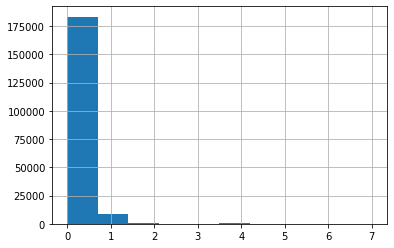

In [ ]:
data.extra_runs.hist()

In [ ]:
data.sort_values('ball_number').groupby(['id','innings_number']).sum()


extra_runs  total_runs  ...  economy_rate  ball_number
id      innings_number                          ...                           
335982  1                       17         222  ...       1451.56         7462
        2                       19          82  ...        583.16         4733
335983  1                        6         240  ...       1508.64         7451
        2                       11         207  ...       1354.86         7475
335984  1                        7         129  ...        800.75         7346
...                            ...         ...  ...           ...          ...
1237178 2                       10         132  ...        850.40         7165
1237180 1                        8         189  ...       1218.57         7613
        2                        6         172  ...       1091.23         7488
1237181 1                        4         156  ...        973.93         7509
        2                        4         157  ...        954.92         6328

[1630 rows x 16 columns]

In [ ]:
for ele in data.sort_values('ball_number').groupby(['id','innings_number']):
  print(ele[1])
  check = ele[1]
  #sorted ball wise data for each innings 
  check['score'] = check['total_runs'].cumsum()
  break

         id  innings_number  ...  economy_rate  ball_number
116  335982               1  ...         11.71            1
102  335982               1  ...         11.71            2
103  335982               1  ...         11.71            3
104  335982               1  ...         11.71            4
105  335982               1  ...         11.71            5
..      ...             ...  ...           ...          ...
100  335982               1  ...         11.71          116
101  335982               1  ...         11.71          117
113  335982               1  ...         11.71          118
114  335982               1  ...         11.71          119
115  335982               1  ...         11.71          120

[124 rows x 18 columns]


In [ ]:
check.sum()

id                41661768.00
innings_number         124.00
extra_runs              17.00
total_runs             222.00
non_boundary             0.00
is_wicket                3.00
batsman_runs         12845.00
balls_faced           6120.00
strike_rate          22140.79
Boundary Fours         829.00
Boundary Sixes        1021.00
50s                      0.00
100s                    77.00
overs                  382.00
runs_conceded         4898.00
wickets_taken           74.00
economy_rate          1451.56
ball_number           7462.00
score                12220.00
dtype: float64

In [ ]:
check
models = dict()

In [ ]:
data = data.sort_values('ball_number')
score = data.groupby(['id','innings_number'])['total_runs'].cumsum()

In [ ]:
data['score'] = score
data

,id,innings_number,extra_runs,total_runs,non_boundary,is_wicket,batsman_runs,balls_faced,strike_rate,Boundary Fours,Boundary Sixes,50s,100s,overs,runs_conceded,wickets_taken,economy_rate,ball_number,score
107574,734041,1,0,1,0,0,8,17,47.06,1.0,0.0,0,0,1.0,15,0.0,8.18,1,1
96883,729299,1,0,0,0,0,43,42,102.38,2.0,1.0,0,0,3.0,35,2.0,9.55,1,0
150633,1136562,1,0,1,0,0,4,6,66.67,0.0,0.0,0,0,4.0,23,1.0,5.75,1,1
150717,1136562,2,0,0,0,0,51,16,318.75,6.0,4.0,1,0,3.0,34,1.0,8.87,1,0
3110,335995,2,0,1,0,0,1,3,33.33,0.0,0.0,0,0,3.0,31,1.0,8.45,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121609,829817,1,0,1,0,0,1,1,100.00,0.0,0.0,0,0,4.0,40,3.0,10.00,123,187
94072,598072,1,0,0,0,0,19,19,100.00,2.0,0.0,0,0,4.0,43,1.0,10.75,123,165
153651,1136575,1,0,0,0,0,24,17,141.18,2.0,0.0,0,0,4.0,40,1.0,10.00,123,160
179922,1216496,1,0,1,0,0,27,6,450.00,0.0,4.0,0,0,4.0,56,1.0,14.00,123,216


In [ ]:
data.groupby(['id','innings_number'])['score'].max()

id       innings_number
335982   1                 222
         2                  82
335983   1                 240
         2                 207
335984   1                 129
                          ... 
1237178  2                 132
1237180  1                 189
         2                 172
1237181  1                 156
         2                 157
Name: score, Length: 1630, dtype: int64

In [ ]:
data.drop(['id','innings_number'],1,inplace = True)

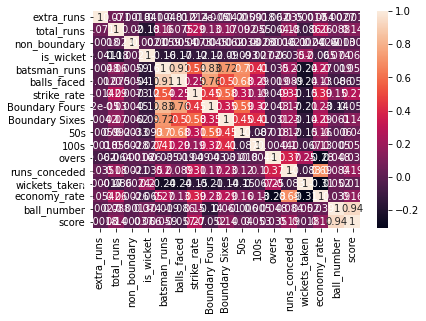

In [ ]:
from seaborn import heatmap
heatmap(data=data.corr(), annot=True)

In [ ]:
data.drop(['extra_runs', 'non_boundary','is_wicket','runs_conceded','batsman_runs'],1,inplace = True)

In [ ]:
data.drop(['overs'],1,inplace = True)

In [ ]:
features = data.drop(['score'], axis=1)
labels = data['score']

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.30, shuffle=True)

In [ ]:
features.columns

Index(['total_runs', 'balls_faced', 'strike_rate', 'Boundary Fours',
       'Boundary Sixes', '50s', '100s', 'wickets_taken', 'economy_rate',
       'ball_number'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train_features, train_labels)
y_pred = model.predict(test_features)

In [ ]:
test_score_forest = str(model.score(test_features, test_labels) * 100)
print(test_score_forest)

95.53704708046149


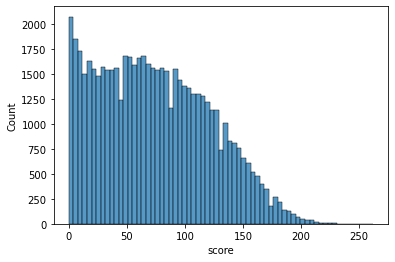

In [ ]:
sns.histplot(test_labels)

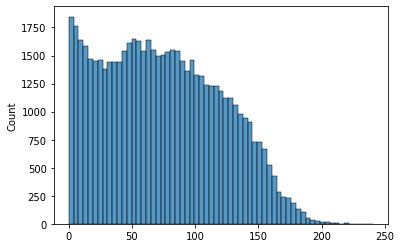

In [ ]:
sns.histplot(y_pred)

In [ ]:
for i in range(10):
  print(int(round(y_pred[i])))

103
54
148
14
32
79
69
56
117
130


In [ ]:
mae(test_labels, y_pred)

7.072522370563308

In [ ]:
mse(test_labels,y_pred )

99.95229011361849

modelling


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(train_features, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.99%
Test Score : 91.19%


In [ ]:
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 8.591990073757497
Mean Squared Error (MSE): 202.23053525884055
Root Mean Squared Error (RMSE): 14.220778293006347


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 90.80%
Test Score : 90.78%


In [ ]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 10.815192506542305
Mean Squared Error (MSE): 210.36481820154367
Root Mean Squared Error (RMSE): 14.503958707937073


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.36%
Test Score : 95.58%


In [ ]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 7.094367862230714
Mean Squared Error (MSE): 100.75781051496661
Root Mean Squared Error (RMSE): 10.037819011865407


In [ ]:
#Lasso Regression
from sklearn.linear_model import LassoCV
lasso = LassoCV()
# Train Model
lasso.fit(train_features, train_labels)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
train_score_lasso = str(lasso.score(train_features, train_labels)*100)
test_score_lasso = str(lasso.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')
models["lasso"] = test_score_lasso

Train Score : 90.57%
Test Score : 90.53%


In [ ]:
print("---- Lasso Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, lasso.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, lasso.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, lasso.predict(test_features)))))

---- Lasso Regression - Model Evaluation ----
Mean Absolute Error (MAE): 10.916737183589012
Mean Squared Error (MSE): 216.03705081794197
Root Mean Squared Error (RMSE): 14.698198897073818


In [ ]:
features.columns

Index(['total_runs', 'balls_faced', 'strike_rate', 'Boundary Fours',
       'Boundary Sixes', '50s', '100s', 'wickets_taken', 'economy_rate',
       'ball_number'],
      dtype='object')

In [ ]:
features

,total_runs,balls_faced,strike_rate,Boundary Fours,Boundary Sixes,50s,100s,wickets_taken,economy_rate,ball_number
107574,1,17,47.06,1.0,0.0,0,0,0.0,8.18,1
96883,0,42,102.38,2.0,1.0,0,0,2.0,9.55,1
150633,1,6,66.67,0.0,0.0,0,0,1.0,5.75,1
150717,0,16,318.75,6.0,4.0,1,0,1.0,8.87,1
3110,1,3,33.33,0.0,0.0,0,0,1.0,8.45,1
...,...,...,...,...,...,...,...,...,...,...
121609,1,1,100.00,0.0,0.0,0,0,3.0,10.00,123
94072,0,19,100.00,2.0,0.0,0,0,1.0,10.75,123
153651,0,17,141.18,2.0,0.0,0,0,1.0,10.00,123
179922,1,6,450.00,0.0,4.0,0,0,1.0,14.00,123
